## Fashion Classification - Neural Network
Task:

Write a neural network to classify different type of cloths.

Assume the dataset to be clean and ready for usage.

In [60]:
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.utils import np_utils
import numpy as np

Training data set shape: (60000, 28, 28).
Testing data set shape: (10000, 28, 28).
Example the a pixel values rows: 
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.         0.         0.05098039 0.28627452 0.
  0.         0.00392157 0.01568628 0.         0.         0.
  0.         0.00392157 0.00392157 0.        ]].

There is a total of 10 different classes of clothing.


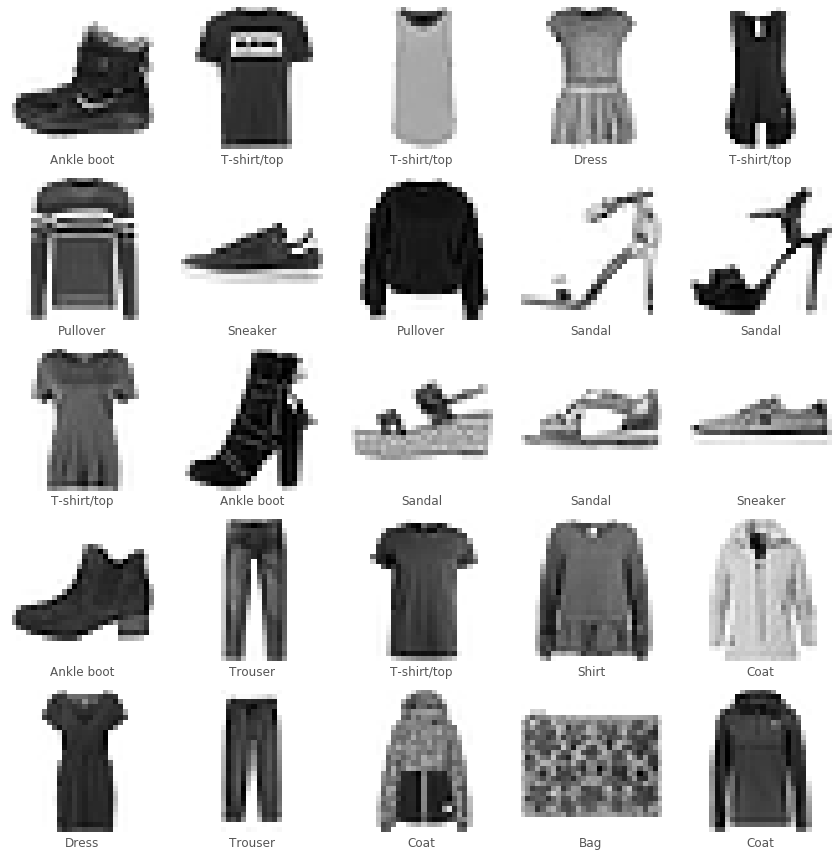

In [61]:
fashion_data = keras.datasets.fashion_mnist

(X_train, y_train_label), (X_test, y_test_label) = fashion_data.load_data()

X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

y_train = np_utils.to_categorical(y_train_label, 10)
y_test = np_utils.to_categorical(y_test_label, 10)

print("Training data set shape: {}.".format(X_train.shape))
print("Testing data set shape: {}.".format(X_test.shape))
print("Example the a pixel values rows: \n{}.".format(X_train[0][3:4]))

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print("\nThere is a total of {} different classes of clothing.".format(len(class_names)))

plt.figure(figsize=(12,12))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.tight_layout()
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train_label[i]])
plt.show()

As we can see, we have $60,000$ images to train on and $10,000$ images to test on. An image consist of $28x28$ pixels, each with a designated value between $0$ (white) and $1$ (black).

10000/10000 [==============================] - 0s 22us/sample - loss: 0.3777 - accuracy: 0.8949


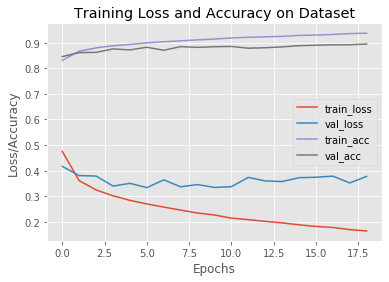

In [62]:
testing_acc_list = []
neural_network_list = []
fit_result_list = []

def neural_network(epochs):
    neural_network = keras.Sequential()
    neural_network.add(keras.layers.Flatten(input_shape=(28,28)))
    neural_network.add(keras.layers.Dense(256, activation='relu'))
    neural_network.add(keras.layers.Dense(128, activation='relu'))
    neural_network.add(keras.layers.Dense(10, activation='softmax'))

    neural_network.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    fit_result = neural_network.fit(X_train,
                        y_train,
                        validation_data=(X_test, y_test),
                        epochs=epochs,
                        verbose=False)
    test_loss, test_acc = neural_network.evaluate(X_test, y_test)
    neural_network_list.append(neural_network)
    testing_acc_list.append(test_acc)
    fit_result_list.append(fit_result)

testing_acc_list = []
neural_network_list = []
fit_result_list = []
epoch_max = 20
for epoch in range(epoch_max):
    neural_network(epoch)

max_test_acc_index = testing_acc_list.index(max(testing_acc_list))

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, max_test_acc_index), fit_result_list[max_test_acc_index].history["loss"], label="train_loss")
plt.plot(np.arange(0, max_test_acc_index), fit_result_list[max_test_acc_index].history["val_loss"], label="val_loss")
plt.plot(np.arange(0, max_test_acc_index), fit_result_list[max_test_acc_index].history["accuracy"], label="train_acc")
plt.plot(np.arange(0, max_test_acc_index), fit_result_list[max_test_acc_index].history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epochs")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="best")
figname = 'nn_epoch_test.png'
plt.savefig(figname)
    
# plt.plot(epoch_settings, testing_acc_list, label='Classification Accuracy on the Test Set')
# plt.ylabel('Accuracy')
# plt.xlabel('Number of epochs')
# plt.legend()
# figname = 'nn_epoch_test.png'
# plt.savefig(figname)

Classifictiation Report:

              precision    recall  f1-score   support

 T-shirt/top       0.86      0.82      0.84      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.77      0.85      0.81      1000
       Dress       0.89      0.91      0.90      1000
        Coat       0.84      0.80      0.82      1000
      Sandal       0.98      0.97      0.98      1000
       Shirt       0.73      0.71      0.72      1000
     Sneaker       0.95      0.97      0.96      1000
         Bag       0.98      0.97      0.97      1000
  Ankle boot       0.96      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.90      0.89      0.89     10000
weighted avg       0.90      0.89      0.89     10000

Confusion Matrix:

[[825   1  23  27   3   1 117   0   3   0]
 [  3 976   1  15   1   0   3   0   1   0]
 [ 10   0 855  17  51   1  65   0   1   0]
 [ 18   4  10 911  36   0  18   0   3   0]
 [  0   0 126  23 795   

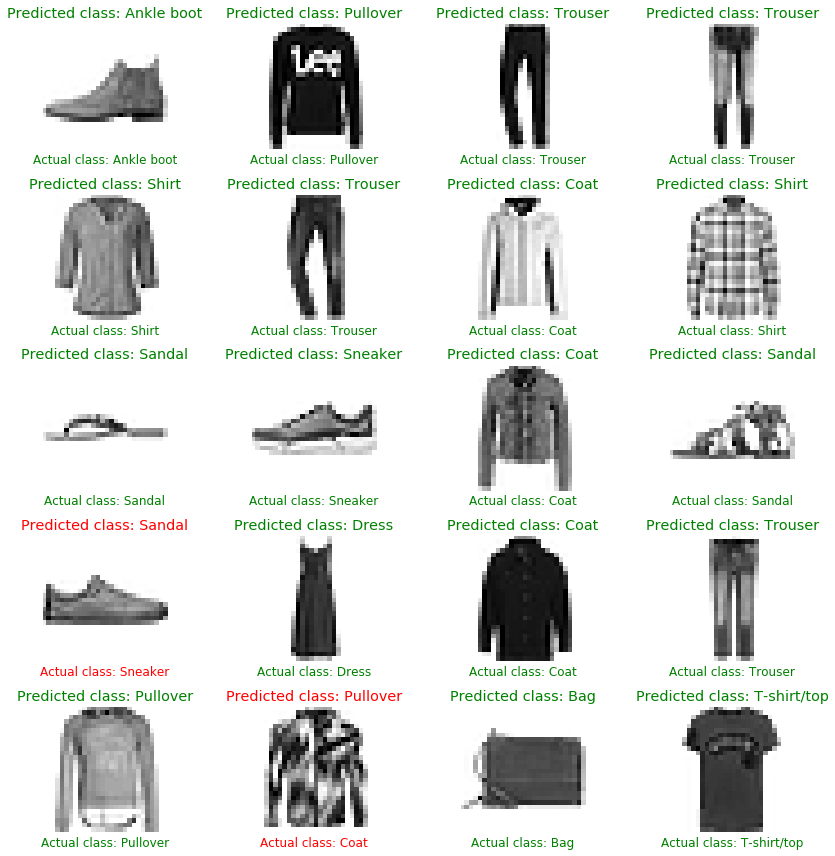

In [68]:
max_test_acc_index = testing_acc_list.index(max(testing_acc_list))

y_predicted_proba = neural_network_list[max_test_acc_index].predict(X_test)
y_predicted_class = [class_names[np.argmax(list)] for list in y_predicted_proba]

print("Classifictiation Report:\n")
print(classification_report(y_test.argmax(axis=1), y_predicted_proba.argmax(axis=1),
target_names=class_names))
print("Confusion Matrix:\n")
print(confusion_matrix(y_test.argmax(axis=1), y_predicted_proba.argmax(axis=1)))

plt.figure(figsize=(12,12))
for i in range(20):
    plt.subplot(5,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.tight_layout()
    plt.imshow(X_test[i], cmap=plt.cm.binary)
    plt.xlabel("Actual class: {}".format(class_names[y_test_label[i]]))
    title_obj = plt.title("Predicted class: {}".format(y_predicted_class[i]))
    x_label_obj = plt.xlabel("Actual class: {}".format(class_names[y_test_label[i]]))
    if y_predicted_class[i] == class_names[y_test_label[i]]:
        plt.setp(title_obj, color='g')
        plt.setp(x_label_obj, color='g')
    else:
        plt.setp(title_obj, color='r')
        plt.setp(x_label_obj, color='r')
plt.show()

As we can see from the Classification Report, $Pullovers$, $Coats$, $Shirts$ and $T-shirts/tops$ are the hardest ones to correctly predict for our neural network. Almost half the time, a $Shirt$ is classified as either a $T-shirt/top$, a $Pullover$ or a $Coat$. 

On the other hand our neural network is especially good at classifying $Trousers$, $Bags$ and $Sandals$. 

So if we want to improve the model, we should probably take a good look at $Shirts$ first.